In [2]:
import numpy as np
import pandas as pd

## Exercise 1 

> How likely is it that you roll doubles when rolling two dice?

- We'll need a high number of simulations
- We'll need to simulate two dice
- What is our observation? Rolling two dice at a time
- What are we measuring in that observation? Doubles... [1, 1], [2, 2], etc...

In [44]:
rolls = pd.DataFrame()
rolls["die1"] = np.random.choice([1, 2, 3, 4, 5, 6], size=100_000)
rolls["die2"] = np.random.choice([1, 2, 3, 4, 5, 6], size=100_000)
rolls.head()

,die1,die2
0,1,2
1,5,3
2,5,1
3,1,6
4,4,3


In [47]:
2 == 2

True

In [48]:
rolls["is_pair"] = rolls.die1 == rolls.die2
rolls.is_pair.mean()

0.16522

In [49]:
# Numpy only
a = np.random.choice([1, 2, 3, 4, 5, 6], size=100_000)
b = np.random.choice([1, 2, 3, 4, 5, 6], size=100_000)
(a == b).mean()

0.16623

In [50]:
# What's the theoretical probability of pairs?
# 11, 22, 33, 44, 55, 66
# 6 ways to get pairs
# Number of possibilities on 2 six sided dice is 6**2
# 6/ 36 == 1/6
1/6

0.16666666666666666

## Exercise 2
> If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

- We'll need a high number of simulations
- What is a single observation? Probability language calls observation a "trial"
- Observation == Trial == Single Event ==> Flipping 8 coins
- What is the probability(getting exactly 3 heads)

In [62]:
# variable1 = variable2 = value can be how we assign the same value to 2 variables
n_trials = nrows = 10_000
n_coins = ncols = 8

# Observation is the row is the "trial" is the "game" is the "event"

# We'll "encode" heads as a 1 and tails as a 0
flips = np.random.choice([1, 0], n_trials * n_coins).reshape(nrows, ncols)
flips

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [53]:
# axis=1 means Row-wise sum
number_of_heads = flips.sum(axis=1)

In [54]:
flips[0]

array([1, 0, 0, 1, 1, 0, 0, 1])

In [55]:
number_of_heads[0]

4

In [58]:
number_of_heads

array([4, 4, 3, ..., 4, 7, 3])

In [60]:
# Probability of Flipping exactly 3 heads on 8 coins
(number_of_heads == 3).mean()

0.2271

In [61]:
# Probabiliy of flipping more than 3 heads on 8 coins
(number_of_heads > 3).mean()

0.6266

## Exercise 3
> There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup.
Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

- We need lots of simulations to get a more accurate understanding
- setup a choice of two outcomes and set a probability
- An observation here is 2 billboards
- What we're trying to measure: probability of both being Data Science

In [63]:
outcomes = np.random.choice(["Web Dev", "Data Science"], size=(100_000, 2), p=[.75, .25])
outcomes

array([['Data Science', 'Web Dev'],
       ['Web Dev', 'Data Science'],
       ['Data Science', 'Web Dev'],
       ...,
       ['Web Dev', 'Data Science'],
       ['Web Dev', 'Web Dev'],
       ['Web Dev', 'Data Science']], dtype='<U12')

In [64]:
df = pd.DataFrame(outcomes)
df.columns = ["first_billboard", "second_billboard"]
df.head()

,first_billboard,second_billboard
0,Data Science,Web Dev
1,Web Dev,Data Science
2,Data Science,Web Dev
3,Web Dev,Data Science
4,Web Dev,Web Dev


In [67]:
# & is the AND operator but vectorized
# ==, !=, >, <, are vectorized by default, but "and" operator ain't.
df["both_ds"] = (df.first_billboard == "Data Science") & (df.second_billboard == "Data Science")
df["both_ds"].mean()

0.06304

In [68]:
# Theoretical Probability of two billboards being Data Science in a row
# probability of each part of the observation times probability of each part of the observation
.25 * .25

0.0625

## Exercise 4

- Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine.
- If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?



In [72]:
poptarts = np.round(np.random.normal(3, 1.5, size=(100_000, 5)))
poptarts.mean()

2.998852

In [73]:
poptarts[0]

array([5., 5., 2., 5., 2.])

In [75]:
# axis = 1 sums each row, each row is ...
weekly_demand = poptarts.sum(axis=1)

In [77]:
# Weekly demand is less than 17, it means there's poptarts to buy
# Probability that If the machine started with 17 poptarts, that you can buy some on Friday
(weekly_demand < 17).mean()

0.6712

## Exercise 5
Comparing heights
- Men have an average height of 178cm and +- 8cm
- Women have a mean of 170, += 6cm
- If we choose one man and one woman at random, what it the p(woman taller than man)

In [91]:
trials = 100_000
m = np.random.normal(178, 8, trials)
f = np.random.normal(170, 6, trials)

In [92]:
# Boolean array of when each m height is lower than f height
(m < f)

array([ True, False, False, ...,  True,  True, False])

In [93]:
(m < f).mean()

0.21124

In [88]:
(m <= f).mean()

0.22733

## Exercise 6
When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails

- What are the odds that after having 50 students download anaconda, no one has an installation issue?
- 100 students?
- What is the probability that we observe an installation issue within the first 150 students that download anaconda?
- How likely is it that 450 students all download anaconda without an issue?

In [94]:
trials = 100_000

In [97]:
students_per_trial = 50

# 0 is fail, 1 is success
installs = np.random.choice([0, 1], size=(trials, students_per_trial), p=[1/250, 249/250])
df = pd.DataFrame(installs)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [101]:
df["all_good"] = df.sum(axis=1) == students_per_trial

# Average number of times 50 students downloaded anaconda successfully
df.all_good.mean()

0.82029

In [104]:
# Theoretical probability of success
(249/250)**50

0.8184024506760997

In [102]:
students_per_trial = 100
installs = np.random.choice([0, 1], size=(trials, students_per_trial), p=[1/250, 249/250])
df = pd.DataFrame(installs)
df["all_good"] = df.sum(axis=1) == students_per_trial
df.all_good.mean()

0.66996

In [105]:
# Theoretical probability of success
(249/250)**100

0.6697825712726458

In [109]:
# What is the probability that we observe an installation issue (looking for a problem)
# within the first 150 students that download anaconda?
students_per_trial = 150

installs = np.random.choice([0, 1], size=(100_000, students_per_trial), p=[1/250, 249/250])
df = pd.DataFrame(installs)
df["failures"] = df.sum(axis=1) < students_per_trial
print(df.head())
print(f"Average rate of failure of installs on 150 students is {df.failures.mean()}")

   0  1  2  3  4  5  6  7  8  9  ...  141  142  143  144  145  146  147  148  \
0  1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1    1    1   
1  1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1    1    1   
2  1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1    1    1   
3  1  1  1  1  1  0  1  1  1  1  ...    1    1    1    1    1    1    1    1   
4  1  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1    1    1   

   149  failures  
0    1      True  
1    1      True  
2    1      True  
3    1      True  
4    1     False  

[5 rows x 151 columns]
Average rate of failure of installs on 150 students is 0.45132


In [111]:
# How likely is it that 450 students all download anaconda without an issue?
students_per_trial = 450
installs = np.random.choice([0, 1], size=(100_000, students_per_trial), p=[1/250, 249/250])
df = pd.DataFrame(installs)
df["all_good"] = df.sum(axis=1) == students_per_trial
df.head()

,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,all_good
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,False
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,True
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,False
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,False
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,False


In [112]:
df.all_good.mean()

0.16591

In [113]:
# theoretical probability of 450 students all installing OK with no problems
(249/250)**450

0.1647032961586129

## Exercise 7
- There's a 70% chance on any given day that there will be at least one food truck at Travis Park.
- However, you haven't seen a food truck there in 3 days.
- How unlikely is this?

In [115]:
# 1 is a truck, 0 is no truck
trucks = np.random.choice([1, 0], size=(100_000, 3), p=[.7, .3])
df = pd.DataFrame(trucks)
df.columns = ["day_1", "day_2", "day_3"]
df.head()

,day_1,day_2,day_3
0,0,1,1
1,1,1,1
2,1,1,1
3,0,1,1
4,1,0,1


In [116]:
# Theoretical probability of seeing no food trucks across all 3 days
.3 ** 3

0.026999999999999996

In [118]:
# df["appearances"] = df.sum(axis=1)
df["appearances"] = df.day_1 + df.day_2 + df.day_3
df.head()

,day_1,day_2,day_3,appearances
0,0,1,1,2
1,1,1,1,3
2,1,1,1,3
3,0,1,1,2
4,1,0,1,2


In [119]:
(df.appearances == 0).mean()

0.02768

In [123]:
# How likely is it that a food truck shows up sometime in this 7 day week?
trucks = np.random.choice([1, 0], size=(100_000, 7), p=[.7, .3])
df = pd.DataFrame(trucks)

df["appearances"] = df.sum(axis=1)

(df.appearances > 0).mean()

0.99968

In [124]:
# What would be our chances of seeing exactly 0 food trucks in a week?
1 - (df.appearances > 0).mean()

0.00031999999999998696

## Exercise 8
- If 23 people are in a room, what are the odds that two share a birthday?
- What about 20 people in the room?
- What about 40 people in the room?

In [125]:
n_simulations = 100_000
n_people = 23

# Produce some random birthdays
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,153,353,346,342,198,305,27,50,296,219,...,214,73,157,49,28,77,16,136,239,311
1,54,85,204,210,34,251,58,22,155,59,...,196,153,358,262,107,192,194,295,105,339
2,235,241,28,195,308,102,155,267,224,16,...,146,192,161,290,183,347,318,11,16,107
3,231,108,296,143,198,62,78,3,353,116,...,166,91,75,164,181,139,337,206,100,104
4,304,291,118,136,216,307,235,282,145,118,...,75,154,327,249,202,173,44,278,15,111


In [126]:
# get the number of unique values per row (per observation)
# if the number of unique values == number of people in the room, then it means everybody has a different birthday

df["n_unique"] = df.nunique(axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,n_unique
0,153,353,346,342,198,305,27,50,296,219,...,73,157,49,28,77,16,136,239,311,23
1,54,85,204,210,34,251,58,22,155,59,...,153,358,262,107,192,194,295,105,339,23
2,235,241,28,195,308,102,155,267,224,16,...,192,161,290,183,347,318,11,16,107,21
3,231,108,296,143,198,62,78,3,353,116,...,91,75,164,181,139,337,206,100,104,23
4,304,291,118,136,216,307,235,282,145,118,...,154,327,249,202,173,44,278,15,111,22


In [129]:
# If n_unique == 23, zero people share a birthday
# 1 - (df.n_unique == 23).mean()
(df.n_unique != 23).mean()

0.50646

In [130]:
1 - (df.n_unique == 23).mean()

0.50646

In [131]:
# What about 20 people in the room?
# What is probability that two people share a birthday

n_simulations = 100_000
n_people = 20

# Produce some random birthdays
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)
df["n_unique"] = df.nunique(axis=1)
(df.n_unique != n_people).mean()

0.40883

In [132]:
# What about 40 people in the room?
# What is probability that two people share a birthday

n_simulations = 100_000
n_people = 40

# Produce some random birthdays
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)
df["n_unique"] = df.nunique(axis=1)
(df.n_unique != n_people).mean()

0.89201

# Let's graph this out!


In [134]:
# What if we have rooms of increasing size

x = range(1, 100)

# N will be a list of N for each room size
N = [n * (n-1) / 2 for n in x]

# Get the probability for each N
y = [1 - (364/365)**n for n in N]

Text(0, 0.5, 'Probability')

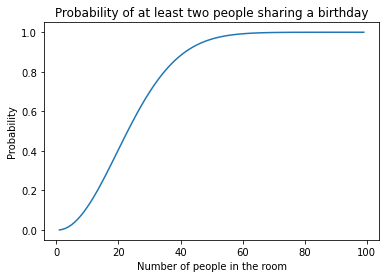

In [135]:
import matplotlib.pyplot as plt

plt.title("Probability of at least two people sharing a birthday")
plt.plot(x, y)
plt.xlabel("Number of people in the room")
plt.ylabel("Probability")